In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, roc_curve, auc
from scipy.stats import randint

plt.style.use('ggplot')

def check_values(df, columns):
    for col in columns:
        print(f"unique value : {df[col].unique()}")
        print(f"Value count : {df[col].value_counts()}")
        print(f"Total unique number : {df[col].nunique()}")
        print(f"Total null value: {df[col].isnull().sum()}")
        print(f"Null data : {df[df[col].isnull()]}")


In [174]:
df = pd.read_csv("loan_approval_dataset.csv")
#remove whitespace on column names
df.columns = df.columns.str.strip().str.lower()

categorical_col = df.select_dtypes(include=object).columns
df[categorical_col] = df[categorical_col].apply(lambda x: x.str.strip())

print(df.info())
print(df.shape)
print(f"Null value : {df.isnull().sum()}")
print(f"Duplicated value : {df.duplicated().sum()}")
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
None
(4269, 13)
Null value : l

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [175]:
# data preparation
# convert income and assets to mil unit 

currency_features = ["income_annum","loan_amount","residential_assets_value","commercial_assets_value","luxury_assets_value","bank_asset_value"]
for col in currency_features: 
    df[col] = df[col]/(1e6)

df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9.6,29.9,12,778,2.4,17.6,22.7,8.0,Approved
1,2,0,Not Graduate,Yes,4.1,12.2,8,417,2.7,2.2,8.8,3.3,Rejected
2,3,3,Graduate,No,9.1,29.7,20,506,7.1,4.5,33.3,12.8,Rejected
3,4,3,Graduate,No,8.2,30.7,8,467,18.2,3.3,23.3,7.9,Rejected
4,5,5,Not Graduate,Yes,9.8,24.2,20,382,12.4,8.2,29.4,5.0,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1.0,2.3,12,317,2.8,0.5,3.3,0.8,Rejected
4265,4266,0,Not Graduate,Yes,3.3,11.3,20,559,4.2,2.9,11.0,1.9,Approved
4266,4267,2,Not Graduate,No,6.5,23.9,18,457,1.2,12.4,18.1,7.3,Rejected
4267,4268,1,Not Graduate,No,4.1,12.8,8,780,8.2,0.7,14.1,5.8,Approved


In [176]:
# is the dataset balanced or imbalanced?
df['loan_status'].value_counts(normalize=True)

loan_status
Approved    0.62216
Rejected    0.37784
Name: proportion, dtype: float64

/var/folders/w5/nyp7f5y53w53xb69z47g2g3h0000gn/T/ipykernel_86040/3571870652.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


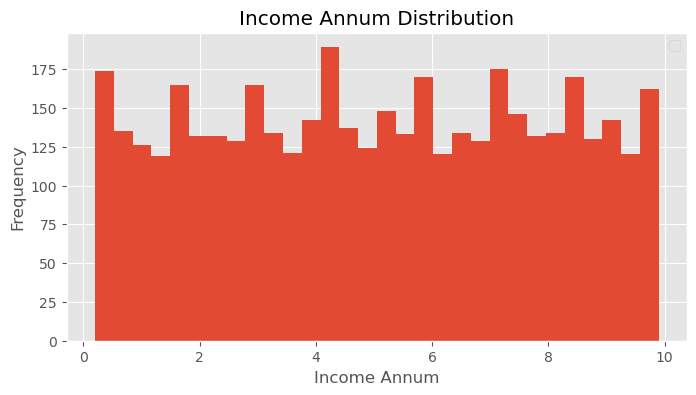

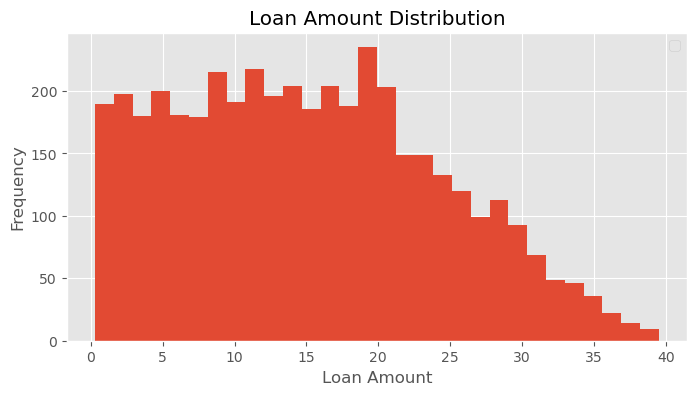

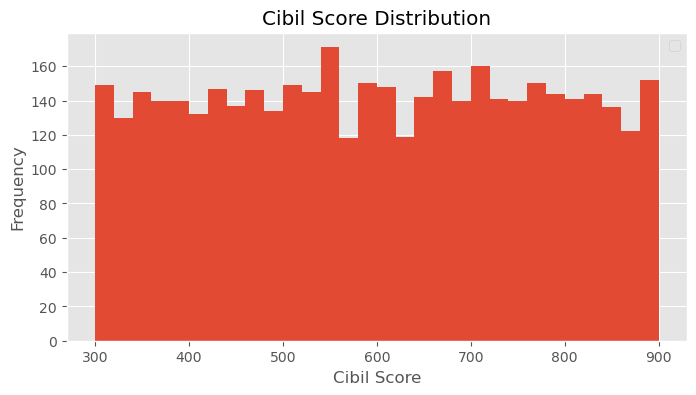

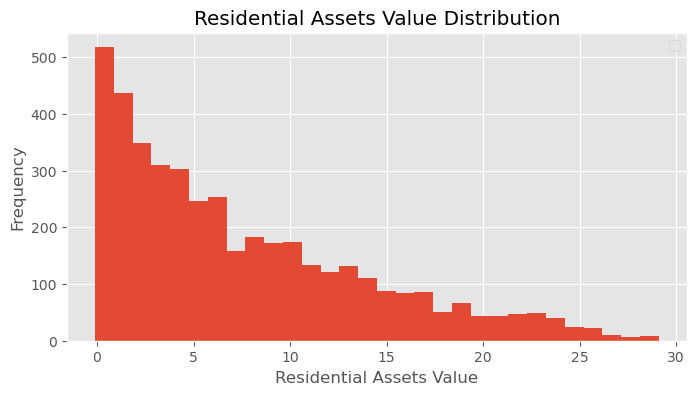

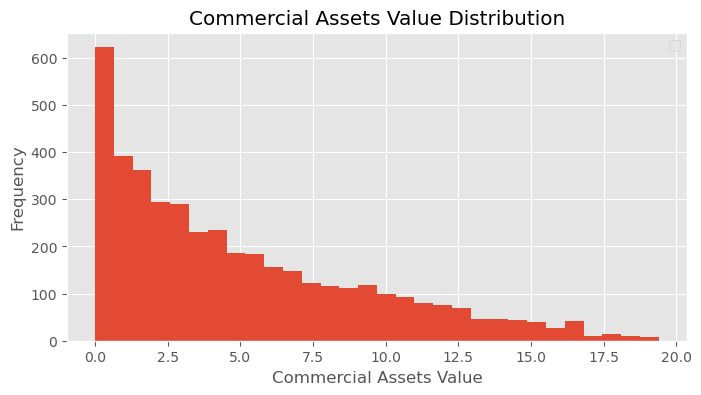

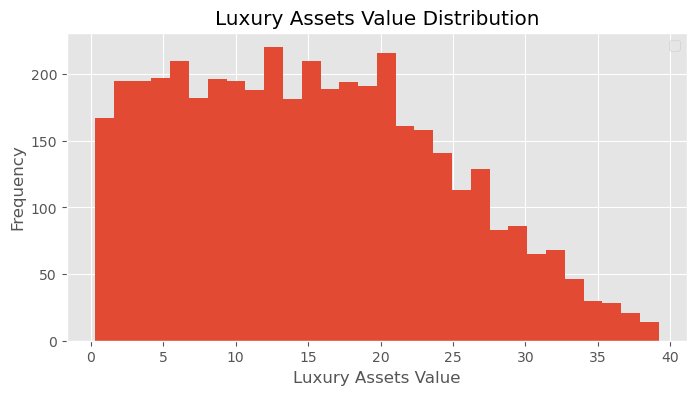

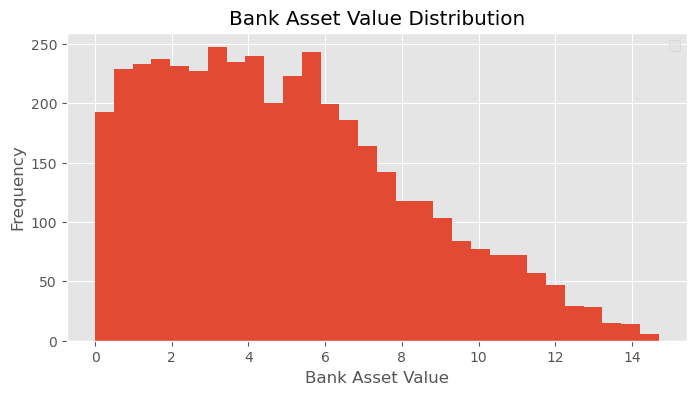

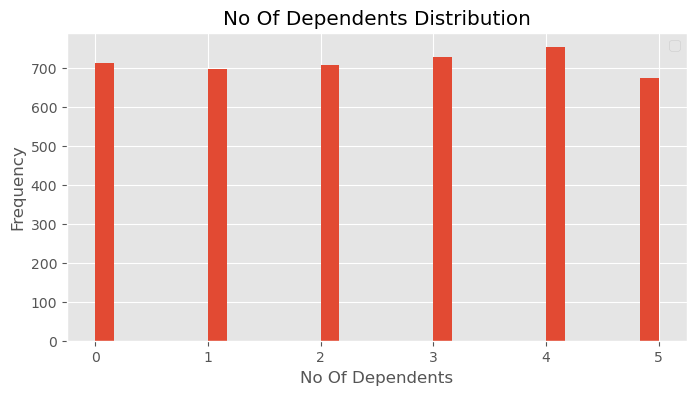

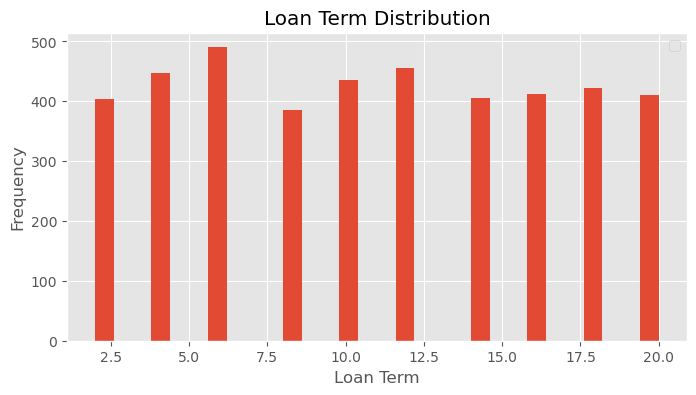

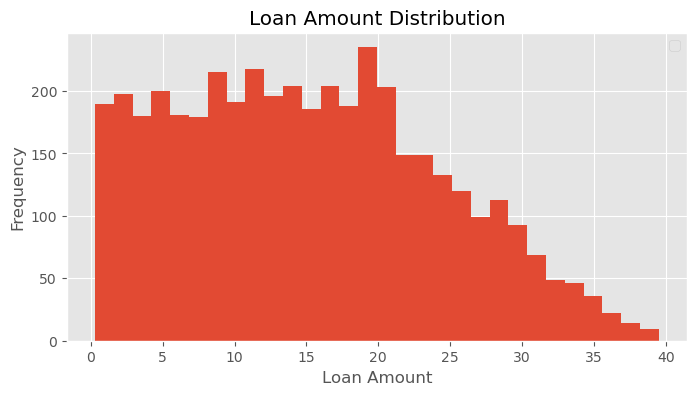

In [177]:
num_features = ['income_annum', 'loan_amount', 'cibil_score','residential_assets_value','commercial_assets_value',
                'luxury_assets_value','bank_asset_value','no_of_dependents','loan_term','loan_amount']

for col in num_features:
    plt.figure(figsize=(8,4))
    plt.hist(df[col], bins=30) 
    plt.title(f'{col.replace("_"," ").title()} Distribution')   
    plt.xlabel(f'{col.replace("_"," ").title()}')
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

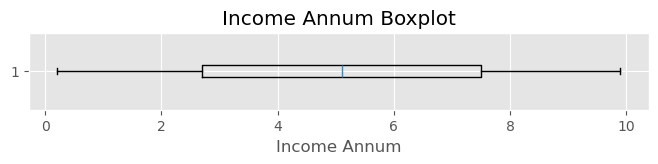

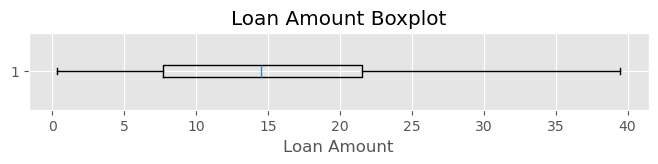

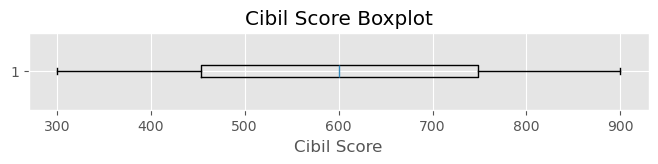

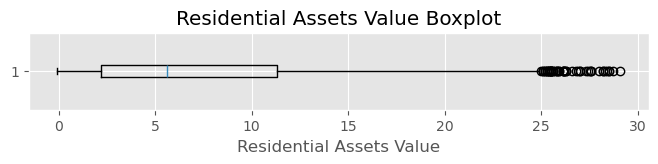

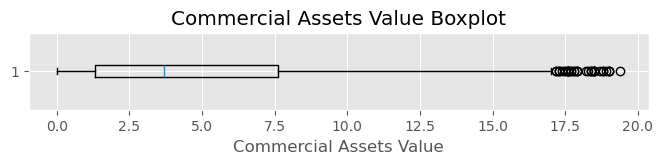

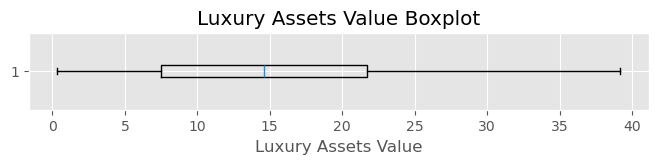

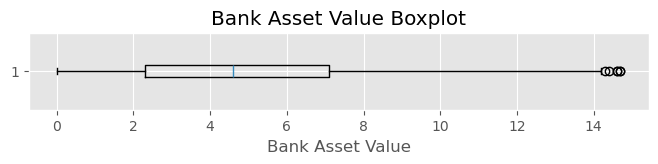

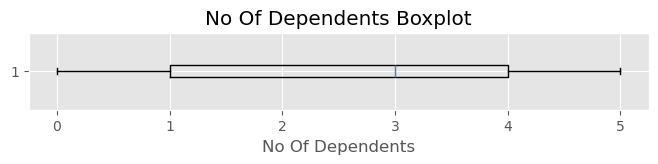

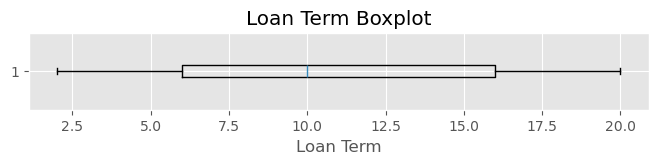

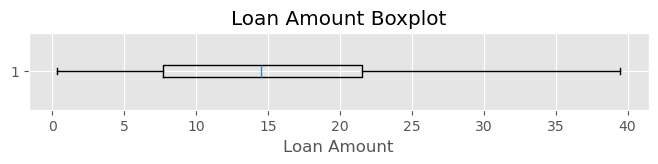

In [178]:
# To check outlier
#print(df[num_features].describe())
for col in num_features:
    plt.figure(figsize=(8,1))
    plt.boxplot(df[col], vert=False)
    plt.title(f'{col.replace("_"," ").title()} Boxplot')
    plt.xlabel(f'{col.replace("_"," ").title()}')
    plt.show()

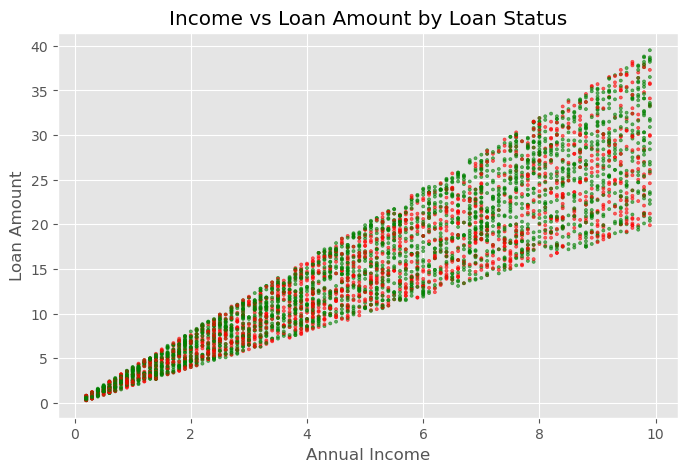

In [179]:
colors = df['loan_status'].map({'Approved':'green', 'Rejected':'red'})

plt.figure(figsize=(8,5))
plt.scatter(df['income_annum'], df['loan_amount'],s=5,c=colors, alpha=0.6)
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.title('Income vs Loan Amount by Loan Status')
plt.show()

In [180]:
# feature engineering
df['total_assets'] = (
    df['residential_assets_value'] +
    df['commercial_assets_value'] +
    df['luxury_assets_value'] +
    df['bank_asset_value']
)

df['loan_to_income_ratio'] = df['loan_amount'] / df['income_annum']
df['assets_to_loan_ratio'] = df['total_assets'] / df['loan_amount']

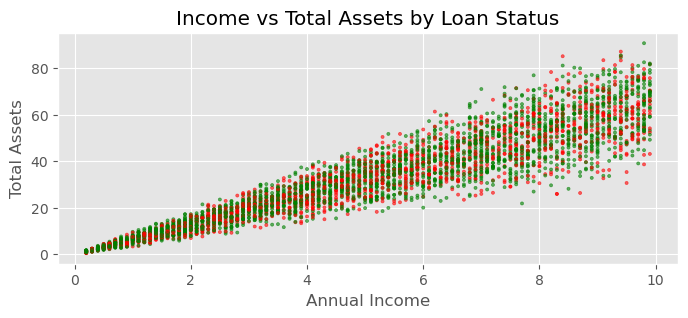

In [181]:
plt.figure(figsize=(8,3))
plt.scatter(df['income_annum'], df['total_assets'],s=5,c=colors, alpha=0.6)
plt.xlabel('Annual Income')
plt.ylabel('Total Assets')
plt.title('Income vs Total Assets by Loan Status')
plt.show()

In [182]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,total_assets,loan_to_income_ratio,assets_to_loan_ratio
0,1,2,Graduate,No,9.6,29.9,12,778,2.4,17.6,22.7,8.0,Approved,50.7,3.114583,1.695652
1,2,0,Not Graduate,Yes,4.1,12.2,8,417,2.7,2.2,8.8,3.3,Rejected,17.0,2.975610,1.393443
2,3,3,Graduate,No,9.1,29.7,20,506,7.1,4.5,33.3,12.8,Rejected,57.7,3.263736,1.942761
3,4,3,Graduate,No,8.2,30.7,8,467,18.2,3.3,23.3,7.9,Rejected,52.7,3.743902,1.716612
4,5,5,Not Graduate,Yes,9.8,24.2,20,382,12.4,8.2,29.4,5.0,Rejected,55.0,2.469388,2.272727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1.0,2.3,12,317,2.8,0.5,3.3,0.8,Rejected,7.4,2.300000,3.217391
4265,4266,0,Not Graduate,Yes,3.3,11.3,20,559,4.2,2.9,11.0,1.9,Approved,20.0,3.424242,1.769912
4266,4267,2,Not Graduate,No,6.5,23.9,18,457,1.2,12.4,18.1,7.3,Rejected,39.0,3.676923,1.631799
4267,4268,1,Not Graduate,No,4.1,12.8,8,780,8.2,0.7,14.1,5.8,Approved,28.8,3.121951,2.250000


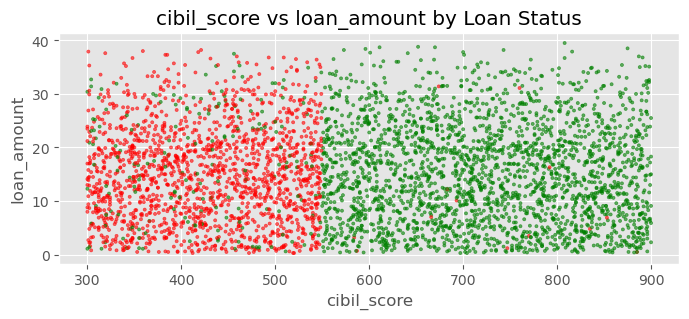

In [183]:
plt.figure(figsize=(8,3))
plt.scatter(df['cibil_score'], df['loan_amount'],s=5,c=colors, alpha=0.6)
plt.xlabel('cibil_score')
plt.ylabel('loan_amount')
plt.title('cibil_score vs loan_amount by Loan Status')
plt.show()

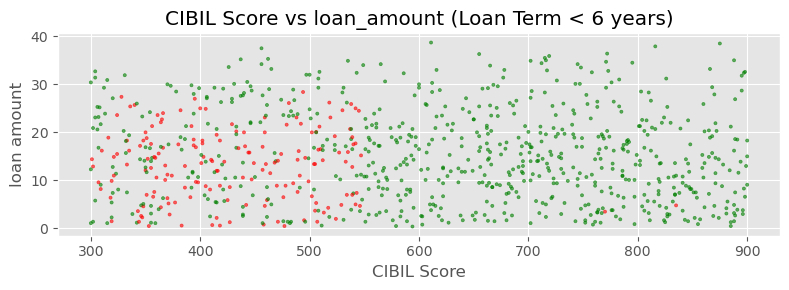

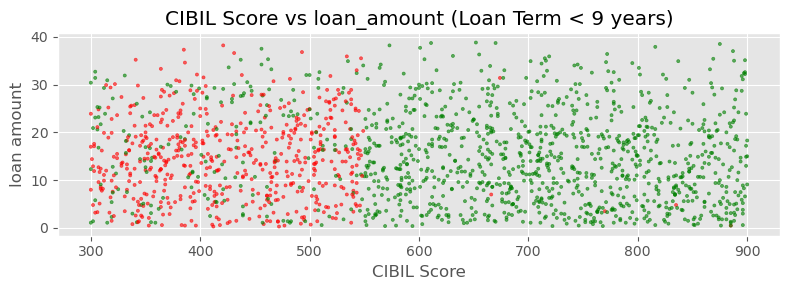

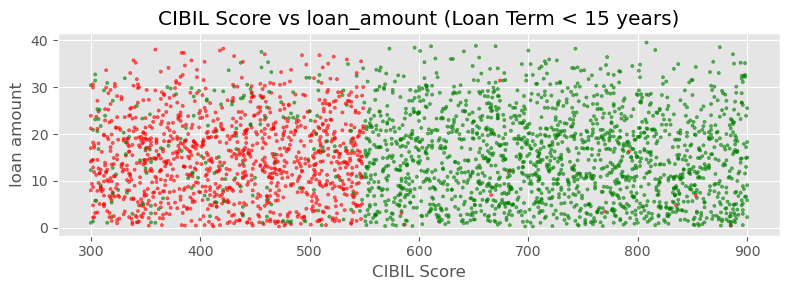

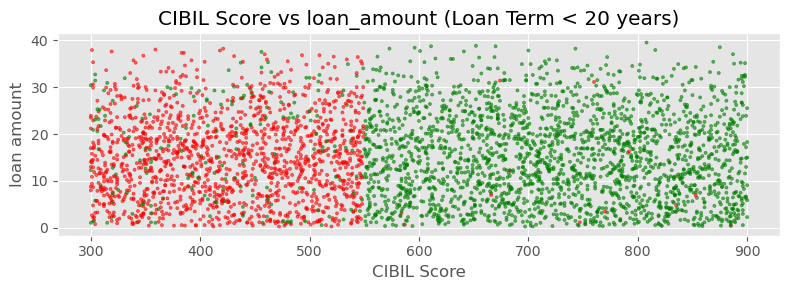

In [212]:
#
    
for num in [6, 9, 15, 20]:
    df_self_emp = df[df['loan_term'] < num]
    
    colors = df_self_emp['loan_status'].map({
        'Approved': 'green',
        'Rejected': 'red'
    })

    plt.figure(figsize=(8, 3))
    plt.scatter(
        df_self_emp['cibil_score'],
        df_self_emp['loan_amount'],
        s=5,
        c=colors,
        alpha=0.6
    )
    plt.xlabel('CIBIL Score')
    plt.ylabel('loan amount')
    plt.title(f'CIBIL Score vs loan_amount (Loan Term < {num} years)')
    plt.tight_layout()
    plt.show()


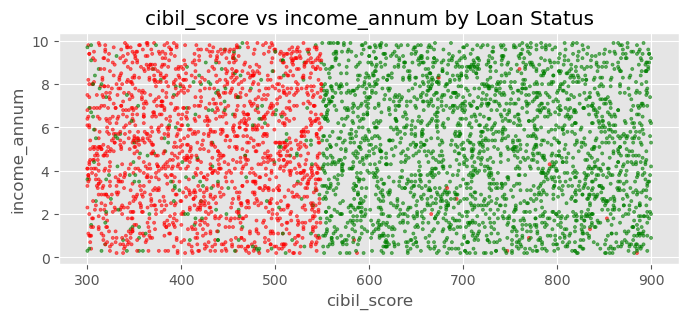

In [260]:
colors = df['loan_status'].map({'Approved':'green', 'Rejected':'red'})

plt.figure(figsize=(8,3))
plt.scatter(df['cibil_score'], df['income_annum'],s=5,c=colors, alpha=0.6)
plt.xlabel('cibil_score')
plt.ylabel('income_annum')
plt.title('cibil_score vs income_annum by Loan Status')
plt.show()

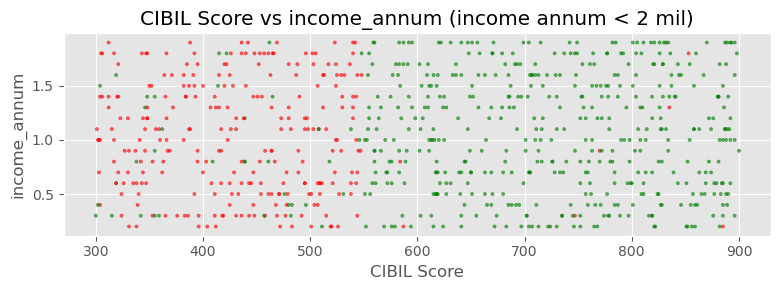

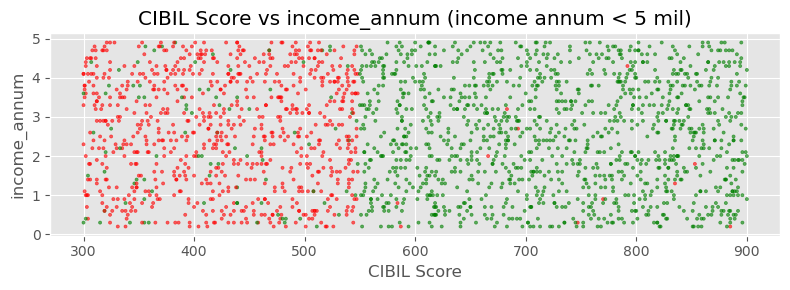

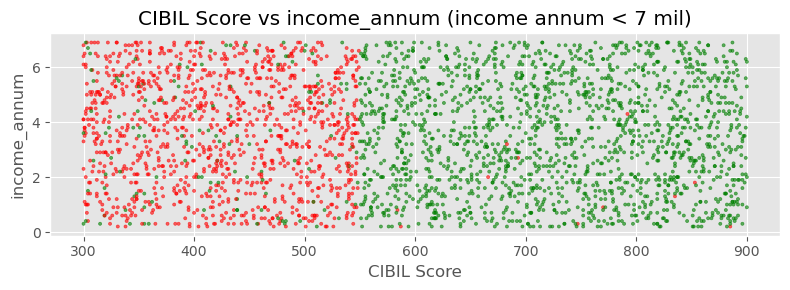

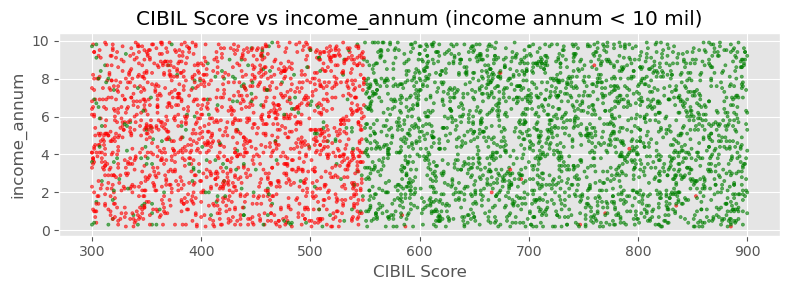

In [186]:
#
    
for num in [2, 5, 7, 10]:
    df_self_emp = df[df['income_annum'] < num]
    
    colors = df_self_emp['loan_status'].map({
        'Approved': 'green',
        'Rejected': 'red'
    })

    plt.figure(figsize=(8, 3))
    plt.scatter(
        df_self_emp['cibil_score'],
        df_self_emp['income_annum'],
        s=5,
        c=colors,
        alpha=0.6
    )
    plt.xlabel('CIBIL Score')
    plt.ylabel('income_annum')
    plt.title(f'CIBIL Score vs income_annum (income annum < {num} mil)')
    plt.tight_layout()
    plt.show()


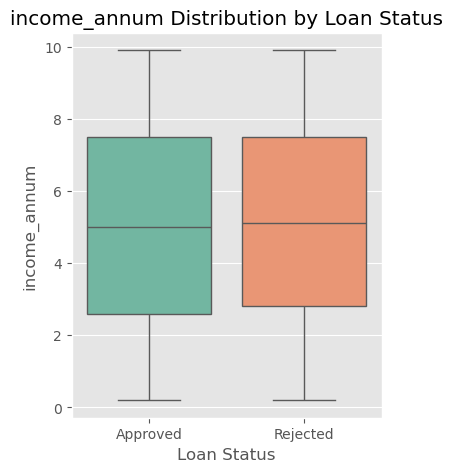

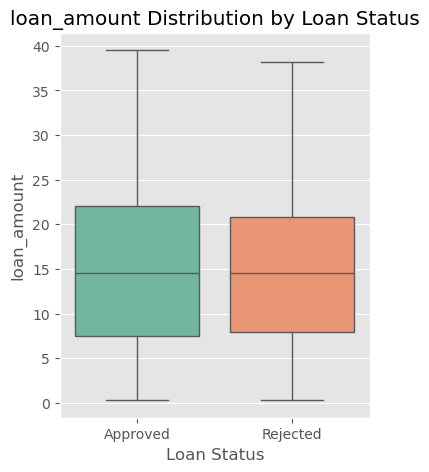

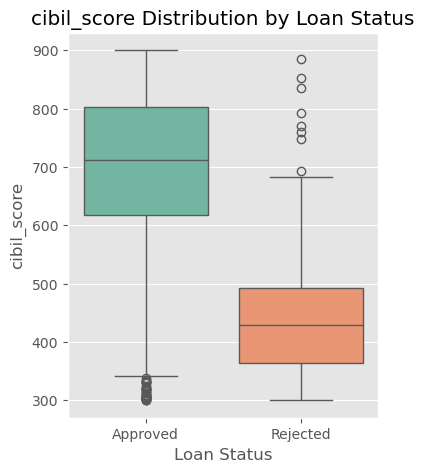

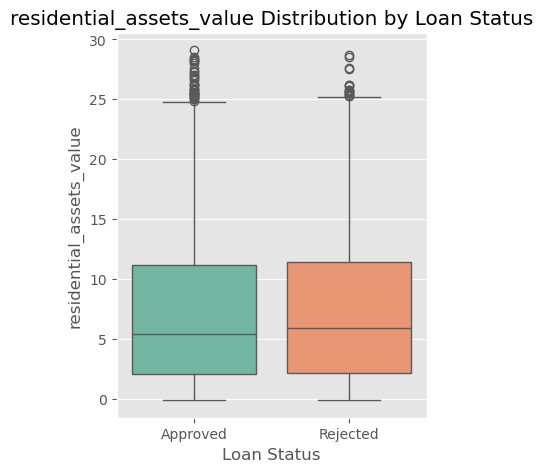

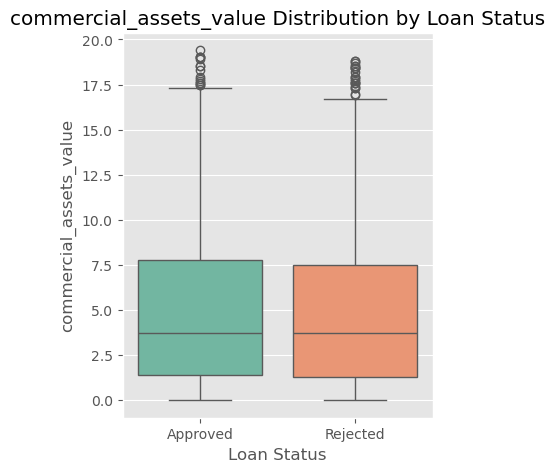

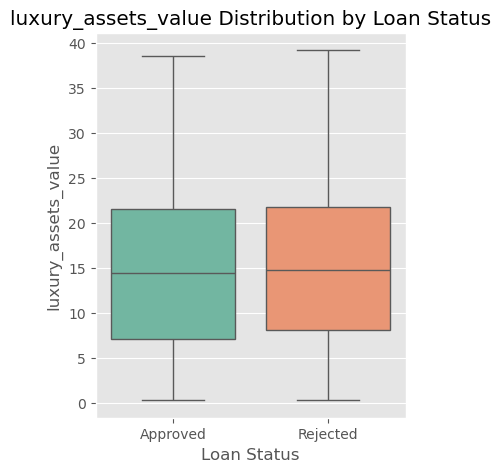

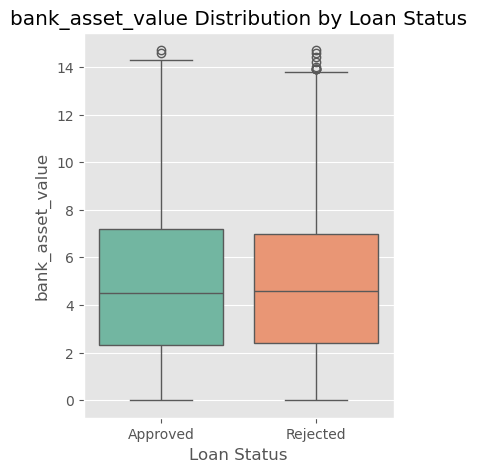

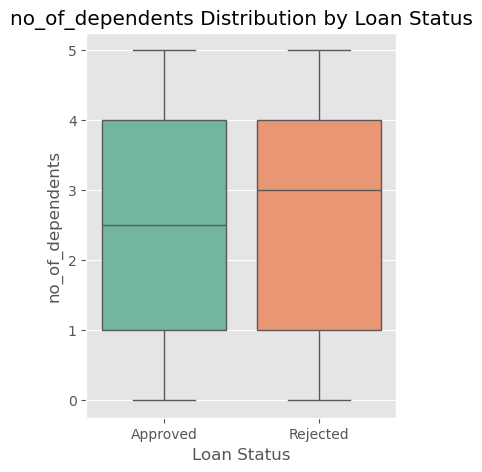

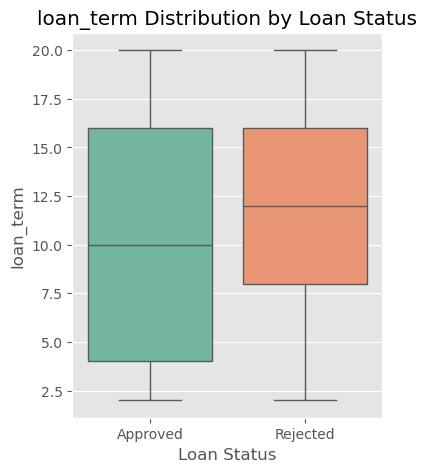

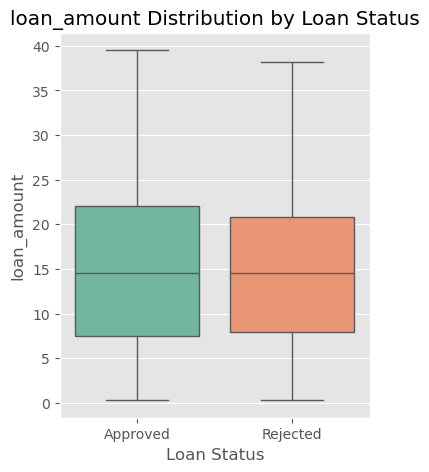

In [187]:
#Bivariate Analysis (Feature vs Loan Status)
for col in num_features:
    plt.figure(figsize=(4,5))
    sns.boxplot(x='loan_status',y=col,data=df,hue='loan_status', palette='Set2')
    
    plt.title(f"{col} Distribution by Loan Status")
    plt.xlabel('Loan Status')
    plt.ylabel(f"{col}")
    plt.show()


In [188]:
# sns.pairplot(df,vars=num_features,hue='loan_status')
# plt.show()

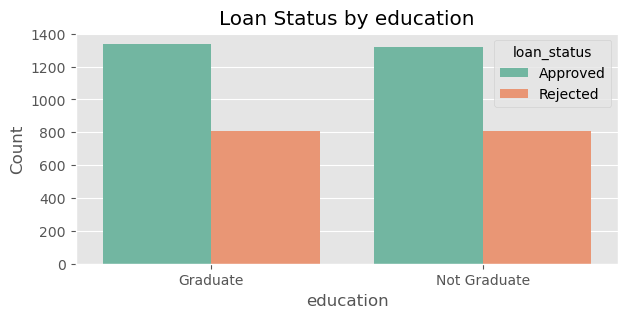

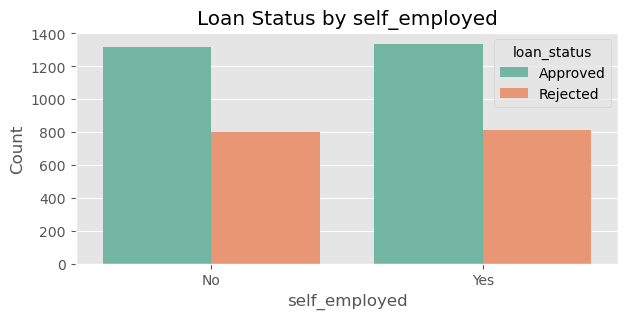

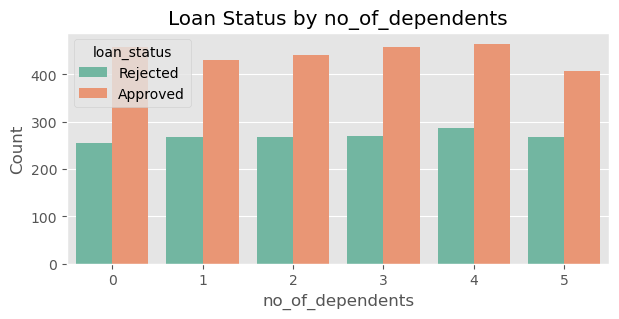

In [189]:
cat_features = ['education', 'self_employed', 'no_of_dependents']
for col in cat_features:
    plt.figure(figsize=(7,3))
    sns.countplot(data=df,x=col,hue='loan_status',palette='Set2')
    plt.title('Loan Status by '+col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [190]:
# Encoding

df["education_encoder"] = df["education"].map({"Graduate":1, "Not Graduate": 0})
print(df[["education", "education_encoder"]].head())

df["self_employed_encoder"] = df["self_employed"].map({"Yes":1, "No": 0})
print(df[["self_employed", "self_employed_encoder"]].head())

df["loan_status_encoder"] = df["loan_status"].map({"Approved":1, "Rejected": 0})
print(df[["loan_status", "loan_status_encoder"]].head())

      education  education_encoder
0      Graduate                  1
1  Not Graduate                  0
2      Graduate                  1
3      Graduate                  1
4  Not Graduate                  0
  self_employed  self_employed_encoder
0            No                      0
1           Yes                      1
2            No                      0
3            No                      0
4           Yes                      1
  loan_status  loan_status_encoder
0    Approved                    1
1    Rejected                    0
2    Rejected                    0
3    Rejected                    0
4    Rejected                    0


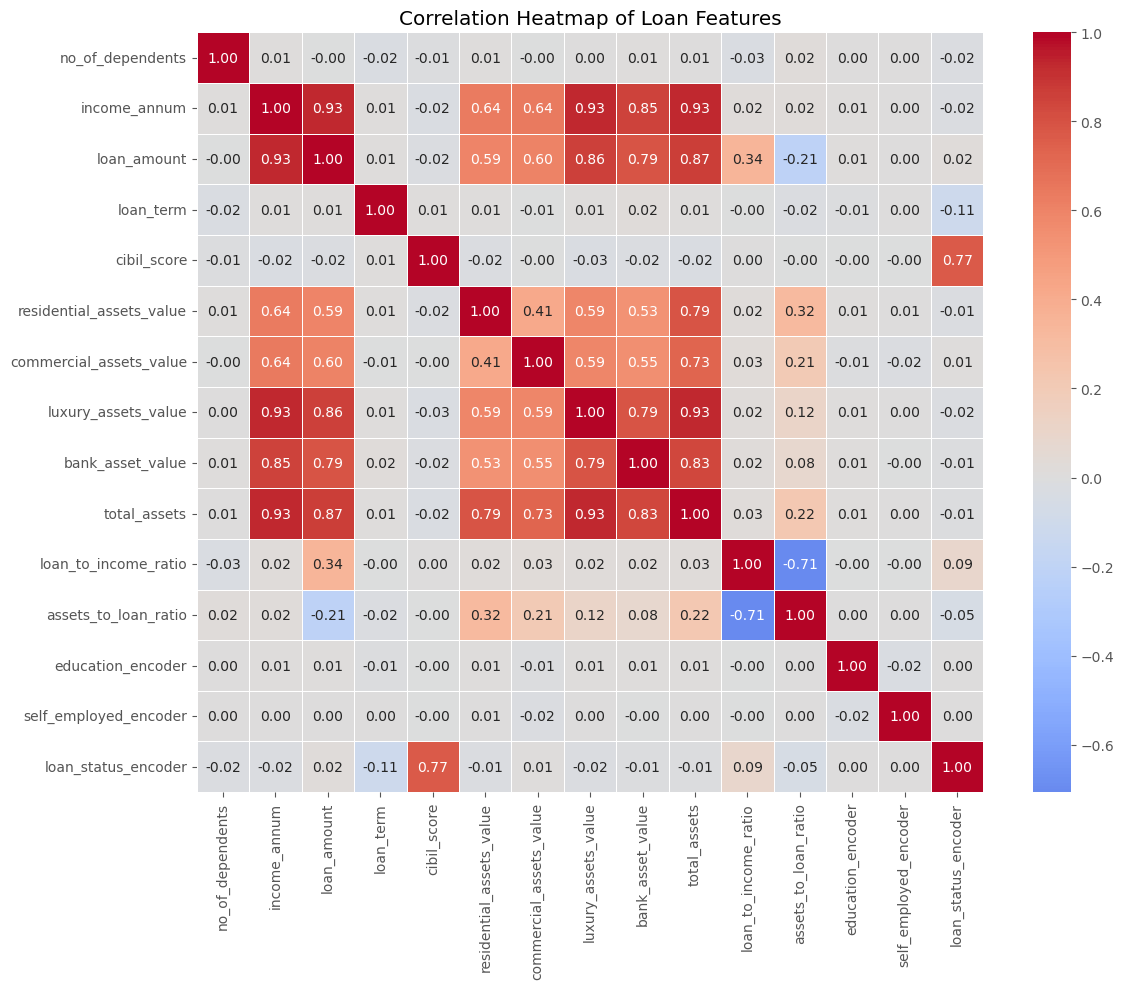

In [191]:
new_df = df.drop(['loan_id','education','self_employed','loan_status'],axis=1)
df_corr_matrix = new_df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(
    df_corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)

plt.title("Correlation Heatmap of Loan Features")
plt.tight_layout()
plt.show()

## Model Training

In [270]:
# Kmean Cluster model
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

cluster_features = [
    "cibil_score",
    "loan_to_income_ratio",
    "assets_to_loan_ratio"
]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[cluster_features])

scaled_data_df = pd.DataFrame(
    X_scaled,
    index=df.index,
    columns=cluster_features
)
scaled_data_df

,cibil_score,loan_to_income_ratio,assets_to_loan_ratio
0,1.032792,0.217956,-0.833728
1,-1.061051,-0.015446,-1.303677
2,-0.544840,0.468454,-0.449464
3,-0.771045,1.274879,-0.801134
4,-1.264055,-0.865631,0.063648
...,...,...,...
4264,-1.641063,-1.150112,1.532641
4265,-0.237434,0.738019,-0.718252
4266,-0.829046,1.162389,-0.933022
4267,1.044393,0.230330,0.028306


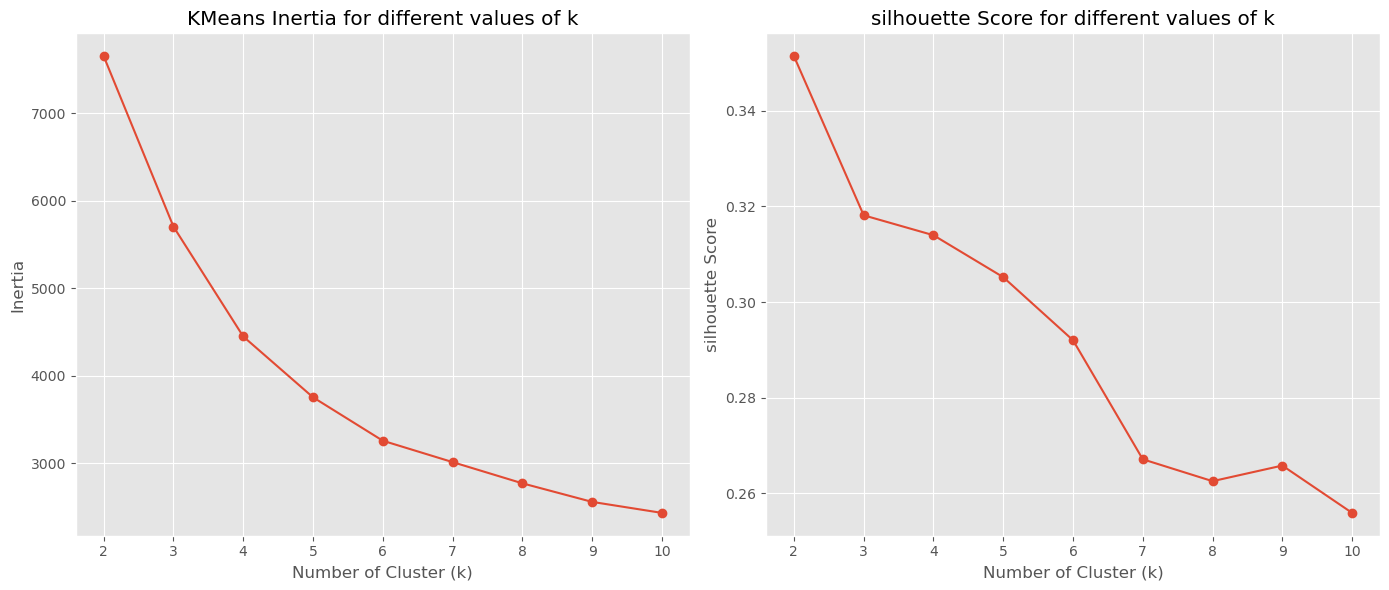

In [244]:
max_k = 10
inertia = []
silhoutte_score = []
k_values = range(2,max_k+1)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=100)
    cluster_labels = kmeans.fit_predict(scaled_data_df)
    sil_score = silhouette_score(scaled_data_df,cluster_labels)
    silhoutte_score.append(sil_score)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.plot(k_values,inertia,marker='o')
plt.title('KMeans Inertia for different values of k')
plt.xlabel('Number of Cluster (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(k_values,silhoutte_score,marker='o')
plt.title('silhouette Score for different values of k')
plt.xlabel('Number of Cluster (k)')
plt.ylabel('silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()

In [246]:
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=1000)
cluster_labels = kmeans.fit_predict(scaled_data_df)
cluster_labels

array([2, 1, 1, ..., 1, 2, 2], dtype=int32)

In [248]:
df["cluster"] = cluster_labels
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,total_assets,loan_to_income_ratio,assets_to_loan_ratio,education_encoder,self_employed_encoder,loan_status_encoder,cluster
0,1,2,Graduate,No,9.6,29.9,12,778,2.4,17.6,22.7,8.0,Approved,50.7,3.114583,1.695652,1,0,1,2
1,2,0,Not Graduate,Yes,4.1,12.2,8,417,2.7,2.2,8.8,3.3,Rejected,17.0,2.975610,1.393443,0,1,0,1
2,3,3,Graduate,No,9.1,29.7,20,506,7.1,4.5,33.3,12.8,Rejected,57.7,3.263736,1.942761,1,0,0,1
3,4,3,Graduate,No,8.2,30.7,8,467,18.2,3.3,23.3,7.9,Rejected,52.7,3.743902,1.716612,1,0,0,1
4,5,5,Not Graduate,Yes,9.8,24.2,20,382,12.4,8.2,29.4,5.0,Rejected,55.0,2.469388,2.272727,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1.0,2.3,12,317,2.8,0.5,3.3,0.8,Rejected,7.4,2.300000,3.217391,1,1,0,0
4265,4266,0,Not Graduate,Yes,3.3,11.3,20,559,4.2,2.9,11.0,1.9,Approved,20.0,3.424242,1.769912,0,1,1,1
4266,4267,2,Not Graduate,No,6.5,23.9,18,457,1.2,12.4,18.1,7.3,Rejected,39.0,3.676923,1.631799,0,0,0,1
4267,4268,1,Not Graduate,No,4.1,12.8,8,780,8.2,0.7,14.1,5.8,Approved,28.8,3.121951,2.250000,0,0,1,2


In [250]:
cluster_summary = (df.groupby("cluster")[cluster_features].mean().round(2))

cluster_summary

,cibil_score,loan_to_income_ratio,assets_to_loan_ratio
cluster,,,
0,594.92,2.36,2.88
1,449.39,3.33,1.87
2,756.06,3.31,1.88


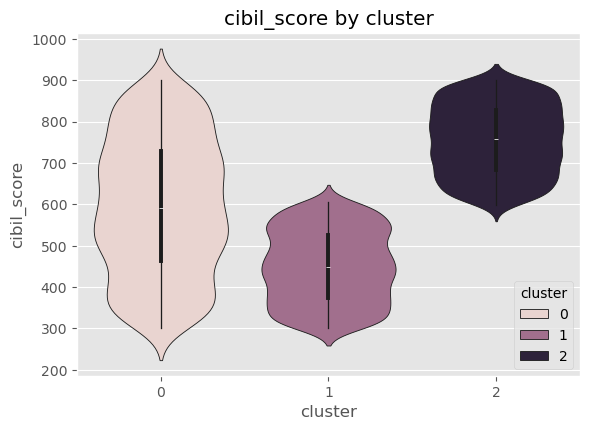

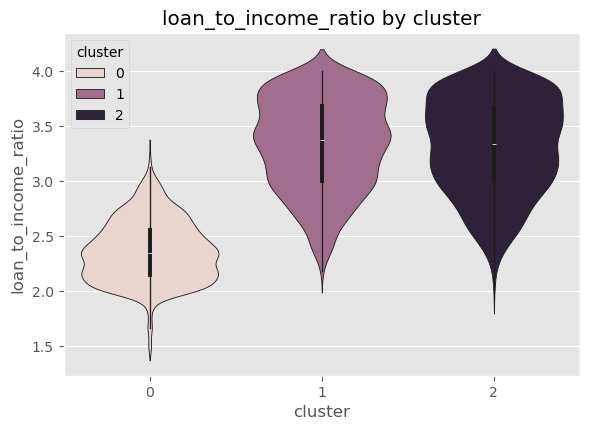

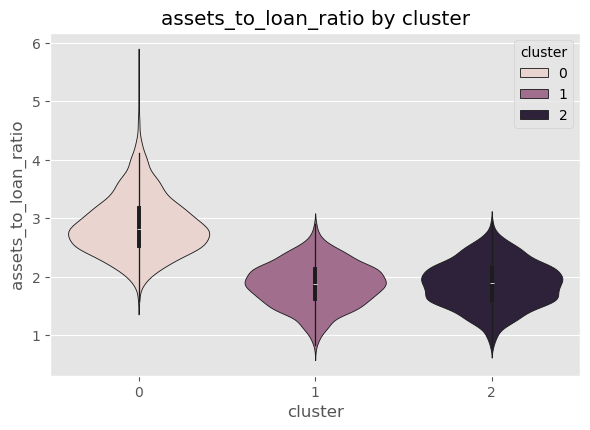

In [252]:
 # 

for col in cluster_features:
    plt.figure(figsize=(6,12))
    
    plt.subplot(3,1,1)
    sns.violinplot(x = df['cluster'],y=df[col], hue=df['cluster'])
    plt.title(f'{col} by cluster')
    plt.ylabel(col)
    
    plt.tight_layout()
    plt.show()

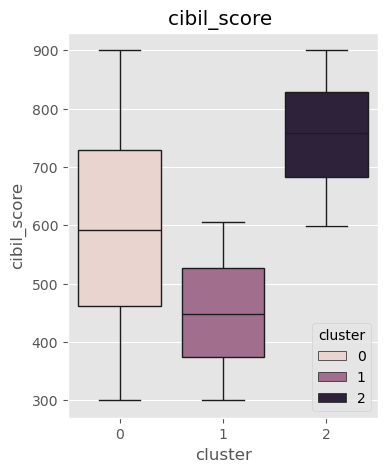

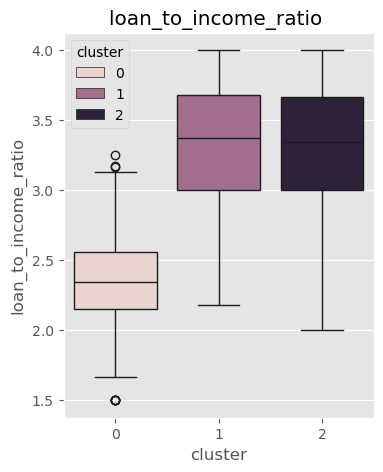

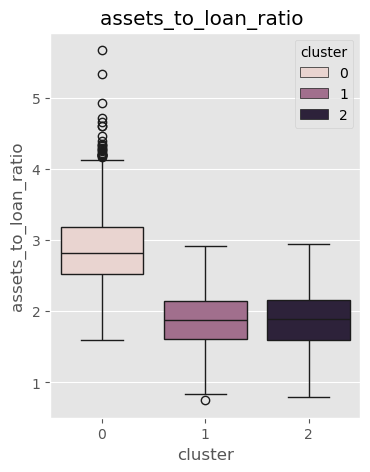

In [254]:
#
for col in cluster_features:
    plt.figure(figsize=(4,5))
    sns.boxplot(x='cluster',y=col,data=df, hue=df['cluster'])
    
    plt.title(f"{col} ")
    plt.xlabel('cluster')
    plt.ylabel(f"{col}")
    plt.show()


In [256]:
status_summary = df.groupby("cluster")["loan_status"].value_counts(normalize=True).unstack().round(2)

final_cluster_table = cluster_summary.merge(
    status_summary,
    left_index=True,
    right_index=True
)
final_cluster_table

,cibil_score,loan_to_income_ratio,assets_to_loan_ratio,Approved,Rejected
cluster,,,,,
0,594.92,2.36,2.88,0.58,0.42
1,449.39,3.33,1.87,0.30,0.70
2,756.06,3.31,1.88,0.99,0.01


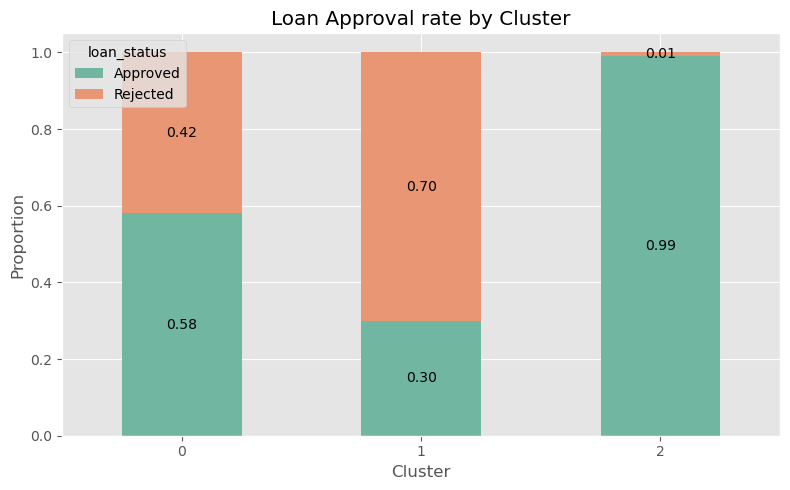

In [258]:
ax = status_summary.plot(
    kind="bar",
    stacked=True,
    figsize=(8,5),
    color=["#71B6A1", "#E99675"]
)

for c in ax.containers:
    ax.bar_label(c, fmt="%.2f", label_type="center")

plt.title("Loan Approval rate by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Cluster Interpretation (Behavioural Risk Profiling)
# Cluster 0 – Asset-Backed, Borderline Borrowers (Medium Risk)
- Key characteristics
CIBIL score:
Median around 590, with a wide distribution (300–900), indicating heterogeneous credit quality.
Loan-to-Income Ratio (LIR):
Lowest among all clusters (median 2.3), reflecting relatively strong repayment affordability.
Assets-to-Loan Ratio (ALR):
Highest median (2.8), suggesting strong collateral coverage.
Approval rate: ~58%
- Behavioural interpretation
Borrowers in this cluster demonstrate strong asset positions and manageable repayment burdens, despite moderate and varied credit scores. The presence of substantial collateral appears to partially offset credit risk. However, approval outcomes remain mixed, indicating that current lending decisions may rely on rigid credit thresholds or rule-based trade-offs rather than holistic financial strength.
- Risk classification
Medium-risk / borderline borrowers
- Potentially under-served segment:
A proportion of borrowers in this cluster possess solid affordability and asset backing yet are rejected, suggesting opportunities for more nuanced risk assessment beyond credit score cut-offs.
# Cluster 1 – Financially Constrained, High-Risk Borrowers (High Risk)
- Key characteristics
CIBIL score:
Lowest median (450) with a narrow range, indicating consistently weak credit profiles.
Loan-to-Income Ratio (LIR):
High median (3.3), reflecting significant repayment pressure.
Assets-to-Loan Ratio (ALR):
Lowest among clusters (~1.8), indicating limited collateral protection.
Approval rate: ~30%
- Behavioural interpretation
This cluster represents borrowers facing multiple layers of financial vulnerability, including weak credit histories, high repayment burden, and insufficient asset backing. These combined factors signal elevated default risk.
- Risk classification
High-risk borrowers
- Approval decisions align closely with risk:
The high rejection rate suggests that current lending policies appropriately identify and manage this risk segment.
# Cluster 2 – Credit-Strong, Prime Borrowers (Low Risk)
- Key characteristics
CIBIL score:
Highest median (750–780) with a tight distribution, indicating consistently strong creditworthiness.
Loan-to-Income Ratio (LIR):
Relatively high (3.3), comparable to Cluster 1.
Assets-to-Loan Ratio (ALR):
Moderate (~1.9).
Approval rate: ~99%
- Behavioural interpretation
Despite higher loan-to-income ratios, borrowers in this cluster achieve near-universal approval due to excellent credit histories. This suggests that lenders place significant weight on credit reliability when assessing repayment risk. Such borrowers may include early-career professionals or recent graduates with limited income history but strong credit behaviour, where lenders anticipate future income growth and stable repayment capacity.
- Risk classification
Low-risk / prime borrowers

In [203]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status',
       'total_assets', 'loan_to_income_ratio', 'assets_to_loan_ratio',
       'education_encoder', 'self_employed_encoder', 'loan_status_encoder',
       'cluster'],
      dtype='object')

In [240]:
#the dataset selecting based on heatmap correlations
baseline_features = [
    "income_annum",
    "loan_amount",
    "loan_term",
    "cibil_score",
    "loan_to_income_ratio",
    "assets_to_loan_ratio",
]
baseline_df = df[baseline_features]
baseline_df

,income_annum,loan_amount,loan_term,cibil_score,loan_to_income_ratio,assets_to_loan_ratio
0,9.6,29.9,12,778,3.114583,1.695652
1,4.1,12.2,8,417,2.975610,1.393443
2,9.1,29.7,20,506,3.263736,1.942761
3,8.2,30.7,8,467,3.743902,1.716612
4,9.8,24.2,20,382,2.469388,2.272727
...,...,...,...,...,...,...
4264,1.0,2.3,12,317,2.300000,3.217391
4265,3.3,11.3,20,559,3.424242,1.769912
4266,6.5,23.9,18,457,3.676923,1.631799
4267,4.1,12.8,8,780,3.121951,2.250000


In [292]:
# Baseline model exclude cluster group from Kmean
X = baseline_df
y = df['loan_status_encoder']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [206]:
y_pred = rf.predict(X_test)

In [294]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.9988290398126464
Confusion Matrix:
[[322   1]
 [  0 531]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       323
           1       1.00      1.00      1.00       531

    accuracy                           1.00       854
   macro avg       1.00      1.00      1.00       854
weighted avg       1.00      1.00      1.00       854



In [290]:
#Hybrid model included cluster group from Kmean

hybrid_features = baseline_features + ["cluster"]
x_hybrid_features = df[hybrid_features]

# Split the data into features (X) and target (y)
X_hybrid = x_hybrid_features
y = df['loan_status_encoder']

# Split the data into training and test sets
X_hybrid_train, X_hybrid_test, y_hybrid_train, y_hybrid_test = train_test_split(X_hybrid, y, test_size=0.2, random_state=42, stratify=y)

rf_hybrid = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_hybrid.fit(X_hybrid_train, y_hybrid_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Accuracy: 0.9988290398126464
Confusion Matrix:
[[322   1]
 [  0 531]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       323
           1       1.00      1.00      1.00       531

    accuracy                           1.00       854
   macro avg       1.00      1.00      1.00       854
weighted avg       1.00      1.00      1.00       854



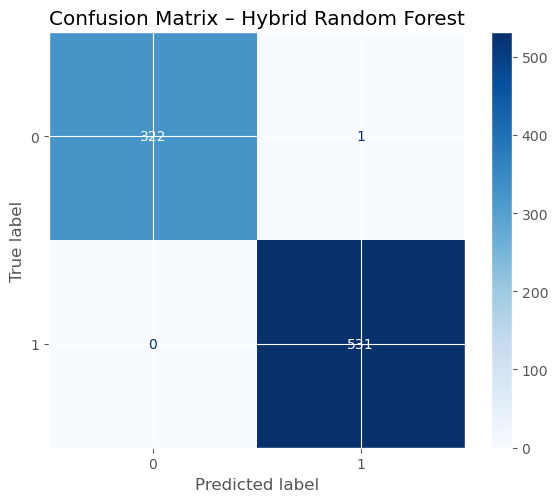

In [316]:
y_hybrid_pred = rf_hybrid.predict(X_hybrid_test)
hybrid_accuracy = accuracy_score(y_hybrid_test, y_hybrid_pred)
print("Accuracy:", hybrid_accuracy)
hybrid_conf_matrix = confusion_matrix(y_hybrid_test, y_hybrid_pred)
print("Confusion Matrix:")
print(hybrid_conf_matrix)
# Classification Report
hybrid_class_report = classification_report(y_hybrid_test, y_hybrid_pred)
print("Classification Report:")
print(hybrid_class_report)

disp = ConfusionMatrixDisplay(
    confusion_matrix=hybrid_conf_matrix,
    display_labels=rf_hybrid.classes_ 
    
)

fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(ax=ax, cmap="Blues", values_format='d')
plt.title("Confusion Matrix – Hybrid Random Forest")
plt.tight_layout()
plt.show()